<a href="https://colab.research.google.com/github/rjc89/Data_science_portfolio/blob/master/mushroom_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Scraping training data from google image search

https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688/80

https://stackoverflow.com/questions/60370799/google-image-download-with-python-cannot-download-images

In [2]:
#!pip install google_images_download
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-lchw48wv
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-lchw48wv
     |████████████████████████████████| 911kB 3.3MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15054 sha256=f6554399b18ffcfe1080e728a30ac21a13a56817d8674505ef0afda395ecaeab
  Stored in directory: /tmp/pip-ephem-wheel-cache-1kigpko6/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [3]:
!wget https://chromedriver.storage.googleapis.com/2.24/chromedriver_linux64.zip && unzip chromedriver_linux64

--2020-06-04 13:25:36--  https://chromedriver.storage.googleapis.com/2.24/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3116161 (3.0M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   2.97M  --.-KB/s    in 0.03s   

2020-06-04 13:25:36 (108 MB/s) - ‘chromedriver_linux64.zip’ saved [3116161/3116161]

Archive:  chromedriver_linux64.zip
  inflating: chromedriver            


In [0]:
chromedriver_path = "/content/chromedriver"
search_queries = ["Boletus", "Pleurotus", "Agaricus", "Macrolepiota", "Cantharellus", "Amanita", "Laetiporus"]

In [0]:
#!googleimagesdownload --keywords search_terms -s medium -o /content/downloads -cd {chromedriver_path}

In [6]:
# importing google_images_download module 
from google_images_download import google_images_download  
  
# creating object 
response = google_images_download.googleimagesdownload()  
  
search_queries = ["Boletus", "Pleurotus", "Agaricus", "Macrolepiota", "Cantharellus", "Amanita", "Laetiporus"]
  
  
def downloadimages(query): 
    # keywords is the search query 
    # format is the image file format 
    # limit is the number of images to be downloaded 
    # print urs is to print the image file url 
    # size is the image size which can 
    # be specified manually ("large, medium, icon") 
    # aspect ratio denotes the height width ratio 
    # of images to download. ("tall, square, wide, panoramic") 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":100, 
                 "print_urls":True, 
                 "size": "medium", 
                 "aspect_ratio":"panoramic"} 
    try: 
        response.download(arguments) 
      
    # Handling File NotFound Error     
    except FileNotFoundError:  
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":100, 
                     "print_urls":True,  
                     "size": "medium"} 
                       
        # Providing arguments for the searched query 
        try: 
            # Downloading the photos based 
            # on the given arguments 
            response.download(arguments)  
        except: 
            pass
  
# Driver Code 
for query in search_queries: 
    downloadimages(query)  
    print()  


Item no.: 1 --> Item name = Boletus
Evaluating...
Starting Download...
Image URL: https://naturallyzagori.gr/wordpress/wp-content/uploads/2014/06/postFeaturedImage.53.jpg
Completed Image ====> 1.postFeaturedImage.53.jpg
Image URL: https://mushring.com/wp-content/uploads/2017/05/Boletus-reticulatus-1-772x347.jpg
Completed Image ====> 2.Boletus-reticulatus-1-772x347.jpg
Image URL: https://www.fondationmironroyer.com/sites/default/files/styles/principale_fiche/public/photos/aa-DSC04678%20%282%29.JPG?itok=2oAnaYYH&c=078fd7e6f6fdd7a475213c9d4cbf7171
Wrong image format returned. Skipping...
Image URL: https://image.shutterstock.com/image-vector/mushroom-boletus-hand-drawn-vector-260nw-1443351602.jpg
Completed Image ====> 3.mushroom-boletus-hand-drawn-vector-260nw-1443351602.jpg
Image URL: https://i1.wp.com/boletes.wpamushroomclub.org/wp-content/uploads/2015/07/Butyriboletus-roseopurpureus-array-Robert-Gergulicsi.jpg?fit=1024%2C512&ssl=1
Wrong image format returned. Skipping...
Image URL: ht

## google image download snippets

In [0]:
# # importing google_images_download module 
# from google_images_download import google_images_download  
  
# # creating object 
# response = google_images_download.googleimagesdownload()  
  
# search_queries = ["Boletus", "Pleurotus", "Agaricus", "Macrolepiota", "Cantharellus", "Amanita", "Laetiporus "]
  
  
# def downloadimages(query): 
#     # keywords is the search query 
#     # format is the image file format 
#     # limit is the number of images to be downloaded 
#     # print urs is to print the image file url 
#     # size is the image size which can 
#     # be specified manually ("large, medium, icon") 
#     # aspect ratio denotes the height width ratio 
#     # of images to download. ("tall, square, wide, panoramic") 
#     arguments = {"keywords": query, 
#                  "format": "jpg", 
#                  "limit":4, 
#                  "print_urls":True, 
#                  "size": "medium", 
#                  "aspect_ratio":"panoramic"} 
#     try: 
#         response.download(arguments) 
      
#     # Handling File NotFound Error     
#     except FileNotFoundError:  
#         arguments = {"keywords": query, 
#                      "format": "jpg", 
#                      "limit":4, 
#                      "print_urls":True,  
#                      "size": "medium"} 
                       
#         # Providing arguments for the searched query 
#         try: 
#             # Downloading the photos based 
#             # on the given arguments 
#             response.download(arguments)  
#         except: 
#             pass
  
# # Driver Code 
# for query in search_queries: 
#     downloadimages(query)  
#     print()  

In [8]:
#!git clone https://github.com/ultralytics/google-images-download
!cd /content/google-images-download
!python3 /content/google-images-download/bing_scraper.py --search 'honeybees on flowers' --limit 10 --download --chromedriver /content/chromedriver

/bin/bash: line 0: cd: /content/google-images-download: No such file or directory
python3: can't open file '/content/google-images-download/bing_scraper.py': [Errno 2] No such file or directory


In [0]:
# from datetime import date

# from google_images_download import google_images_download 

# response = google_images_download.googleimagesdownload()

# planet_arguments = ["mercury planet", "venus planet", "earth planet", "mars planet", "saturn planet", "jupiter planet", "neptune planet", "uranus planet"]
# date_ranges = {
# 	"09/01/2019": "09/30/2019",
# 	"08/01/2019": "08/30/2019",
# 	"07/01/2019": "07/30/2019"
# 	}

# for planet in planet_arguments:
# 	for key, value in date_ranges.items():
# 		time_range = {}
# 		time_range["time_min"] = key
# 		time_range["time_max"] = value

# 		arguments = {
# 			"keywords": planet,
# 			"limit": 500,
# 			"print_urls": True, 
# 			"size": "medium",
# 			"time_range": f"{time_range}",
# 			"output_directory": "./data/",
# 			"image_directory": f"train/{planet}",
# 			"chromedriver": "./content/chromedriver" #this should be the default location of where chromedriver is installed on a linux VM box.
# 			}


# 		paths = response.download(arguments)
# 		print(paths)

In [0]:
#!pip install icrawler

In [0]:
# from icrawler.builtin import (BingImageCrawler, GoogleImageCrawler)
# import logging

In [0]:
# keyword = 'Boletus'

In [0]:
# !mkdir Boletus

In [0]:
# pets = ['cat','leopard','tiger','lion']
# path = os.getcwd()

# for pet in pets:
#     directory = os.path.join(path, r'{}'.format(pet))
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     google_crawler = GoogleImageCrawler(feeder_threads=1,parser_threads=1, downloader_threads=4,storage={'root_dir': directory})
#     filters = dict(size='medium', license='commercial,modify', date=((2019,1,1),(2019,7,27)))
#     google_crawler.crawl(keyword=pet, filters=filters,offset=0,max_num=100,min_size=(100,100),max_size=None, file_idx_offset=0)

In [0]:
# import argparse
# import os

# import numpy as np
# from icrawler.builtin import GoogleImageCrawler


# def get_files(directory, extensions=None, shuffle=False):
#     """
#     Lists files in a directory
#     :return:
#     """

#     if extensions is None:
#         extensions = ['jpg', 'bmp', 'png', 'JPG', 'JPEG']
#     images = []
#     for subdir, dirs, files in os.walk(directory):
#         for file in files:
#             filepath = os.path.join(subdir, file)

#             if extensions is not None:
#                 if any(filepath.endswith(ext) for ext in extensions):
#                     images.append(filepath)
#             else:
#                 images.append(filepath)
#     if shuffle:
#         np.random.shuffle(images)
#     return images


# def write_files_to_file(directory, filename, shuffle=False):
#     files = get_files(directory, shuffle=shuffle)
#     file = open(filename, 'w')
#     file.writelines('\n'.join(files))


# def crawl_and_download(download_dir, keyword, filter_type, filename):
#     try:
#         filters = {'type': filter_type}
#         google_crawler = GoogleImageCrawler(parser_threads=2, downloader_threads=4,
#                                             storage={'root_dir': download_dir})
#         google_crawler.crawl(keyword=keyword, max_num=10,
#                              min_size=(200, 200), max_size=(1024, 1024), filters=filters)
#     finally:
#         write_files_to_file(download_dir, filename)


# def parse_args(args=None):
#     parser = argparse.ArgumentParser()
#     parser.add_argument("-d", "--download_dir", type=str, default="./downloads/", help="download directory")
#     parser.add_argument("-k", "--keyword", type=str, default="face", help="search keyword")
#     parser.add_argument("-f", "--filename", type=str, default=None, help="file to save the list of downloaded files")
#     parser.add_argument("-t", "--type", type=str, default='photo', help="Photo filter type [photo, face, clipart, "
#                                                                         "linedrawing, animated]")
#     args = parser.parse_args(args)
#     if args.filename is None:
#         args.filename = os.path.join(args.download_dir, "files.txt")
#     return args


# def demo():
#     args = "-d download/ -k 'human+face' -t photo -f download/files.txt".split()
#     args = parse_args(args)
#     print("Downloading '{}' of type '{}' into the folder '{}'. Final list will be written to the file '{}'".format(
#         args.keyword, args.type, args.download_dir, args.filename))
#     crawl_and_download(args.download_dir, args.keyword, args.type, args.filename)


# if __name__ == "__main__":
#     args = parse_args()
#     print("Downloading '{}' of type '{}' into the folder '{}'. Final list will be written to the file '{}'".format(
#         args.keyword, args.type, args.download_dir, args.filename))
#     crawl_and_download(args.download_dir, args.keyword, args.type, args.filename)

In [0]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline

In [0]:
# path = "/content"

In [0]:
# tfms = get_transforms(do_flip=False)
# data = (ImageList.from_folder(path)
#         .split_by_rand_pct()
#         .label_from_folder()
#         .transform(tfms, size=224)
#         .databunch()
#         .normalize(imagenet_stats))

In [0]:
# data.show_batch(rows=3, figsize=(10,8))

## Classifier Training
https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_image_retraining.ipynb#scrollTo=RaJW3XrPyFiF

In [20]:
!ls '/content/downloads'

Agaricus  Amanita  Boletus  Cantharellus  Laetiporus  Macrolepiota  Pleurotus


In [21]:
import itertools
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
tf.__version__

TF version: 2.2.0
Hub version: 0.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


'2.2.0'

### Pretrained model selection

In [22]:
module_selection = ("mobilenet_v2_100_224", 224) #@param ["(\"mobilenet_v2_100_224\", 224)", "(\"inception_v3\", 299)"] {type:"raw", allow-input: true}
handle_base, pixels = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

BATCH_SIZE = 32 #@param {type:"integer"}

Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224)


### Dataset setup

In [0]:
data_dir = '/content/downloads'

In [24]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 96 images belonging to 7 classes.
Found 397 images belonging to 7 classes.


### Model definition

In [0]:
do_fine_tuning = True #@param {type:"boolean"}

In [26]:
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 2,232,839
Non-trainable params: 34,112
_________________________________________________________________


### Training, Evaluation, Save Model

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [28]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=5, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history

Epoch 1/5
12/12 [==============================] - 72s 6s/step - loss: 2.0871 - accuracy: 0.2658 - val_loss: 1.5003 - val_accuracy: 0.6042
Epoch 2/5
12/12 [==============================] - 72s 6s/step - loss: 1.4476 - accuracy: 0.5863 - val_loss: 1.8912 - val_accuracy: 0.5000
Epoch 3/5
12/12 [==============================] - 72s 6s/step - loss: 1.2632 - accuracy: 0.6986 - val_loss: 2.0381 - val_accuracy: 0.4896
Epoch 4/5
12/12 [==============================] - 73s 6s/step - loss: 1.1113 - accuracy: 0.7397 - val_loss: 2.0959 - val_accuracy: 0.5208
Epoch 5/5
12/12 [==============================] - 71s 6s/step - loss: 0.9678 - accuracy: 0.8192 - val_loss: 1.8925 - val_accuracy: 0.5625


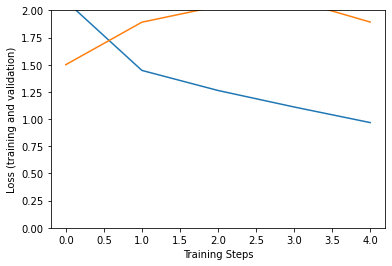

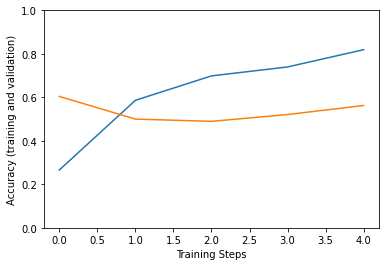

In [29]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])

In [30]:
!mkdir /content/model
saved_model_path = "/content/model"
tf.saved_model.save(model, saved_model_path)
# !mkdir /content/drive/My Drive/Mushroom_classifier/keras/
# model.save('/content/drive/My Drive/Mushroom_classifier/keras/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /content/model/assets


INFO:tensorflow:Assets written to: /content/model/assets


In [31]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 144.4MB 72kB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 256kB 34.8MB/s 
     |████████████████████████████████| 921kB 44.8MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=3d6c3712d3508de963dfdd11b8423c6364a15b9b1281411a0d252168cb4fbe0c
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0.

In [32]:
!mkdir /content/model
!cp /content/drive/My\ Drive/Mushroom_classifier/saved_model.pb /content/model/
!cp -r /content/drive/My\ Drive/Mushroom_classifier/assets/ /content/model/
!cp -r /content/drive/My\ Drive/Mushroom_classifier/variables/ /content/model/

mkdir: cannot create directory ‘/content/model’: File exists


In [0]:
!cp -r /content/drive/My\ Drive/Mushroom_classifier/keras/ /content/

In [0]:
!mkdir /content/tfjs_model

In [0]:
!cd /content/drive/My\ Drive/Mushroom_classifier

In [36]:
!pwd

/content


In [0]:
input_PATH = "/content/drive/My Drive/Mushroom_classifier/saved_model.pb"
output_PATH = "/content/drive/My Drive/Mushroom_classifier/tfjs_model"
# /content/saved_model.pb
# /content/tfjs_model

In [0]:
# `keras` | `tfjs_layers_model` 
# `keras_saved_model` | `tfjs_layers_model`
# `tf_hub` | `tfjs_graph_model`
# `tf_saved_model` | `tfjs_graph_model`

In [39]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model /content/model /content/tfjs_model

2020-06-04 13:40:06.604543: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-06-04 13:40:06.608695: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-06-04 13:40:06.608941: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1d98a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-06-04 13:40:06.608992: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-06-04 13:40:10.956559: I tensorflow/core/grappler/devices.cc:60] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA support)
2020-06-04 13:40:10.956758: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2020-06-04 13:40:11.046659: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:797] 

In [0]:
!cp -r /content/tfjs_model /content/drive/My\ Drive/Mushroom_classifier/tfjs_model

### Optional tensorflow lite
